In [149]:
import pandas as pd

In [150]:
train = pd.read_csv(r'D:\Data Science\Project1\First\Dataset\train.csv')
test = pd.read_csv(r'D:\Data Science\Project1\First\Dataset\test.csv')
data = pd.concat([train, test], ignore_index=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [151]:
dropcol = ['Cabin','Name','Ticket','PassengerId']
for j in dropcol:
    data.drop(j, axis=1, inplace=True)


In [152]:
encod = ['Sex', 'Embarked']
for i in encod:
    sexencode = pd.get_dummies(data[i], prefix=i, drop_first=True)
    data.drop(i, axis=1, inplace=True)
    data = pd.concat([data,sexencode], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Age         714 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   Sex_male    891 non-null    bool   
 7   Embarked_Q  891 non-null    bool   
 8   Embarked_S  891 non-null    bool   
dtypes: bool(3), float64(2), int64(4)
memory usage: 44.5 KB


In [153]:
data.drop('Embarked_Q', axis=1, inplace=True)
data['Survived'] = data['Survived'].fillna(data['Survived'].mean())
data['Age'] = data['Age'].fillna(data['Age'].mean())
data['Fare'] = data['Fare'].fillna(data['Fare'].mean())
data.isnull().sum()


Survived      0
Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_male      0
Embarked_S    0
dtype: int64

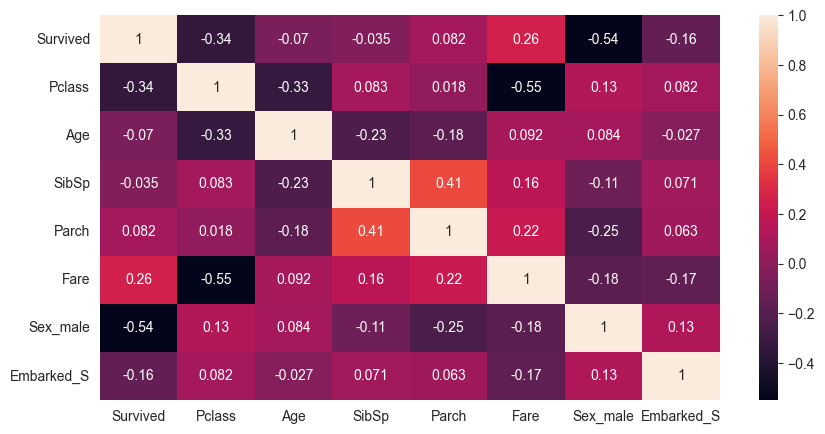

In [154]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.heatmap(data.corr( numeric_only = True), annot=True)
plt.show()

In [155]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
print(data['Survived'].value_counts())
x_train,x_test,y_train,y_test = train_test_split(data.drop('Survived',axis=1),data['Survived'],test_size=0.2,random_state=42)
y_train = y_train.astype('int')
y_test = y_test.astype('int')
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

Survived
0    549
1    342
Name: count, dtype: int64


In [156]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=4, class_weight='balanced',random_state=42)
model.fit(x_train,y_train)
ypred = model.predict(x_test)

In [157]:
from sklearn.metrics import classification_report
print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       105
           1       0.80      0.69      0.74        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179

